In [1]:
# MINMAX
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
class MinMax:
    def __init__(self):
        self.EMPTY = 0
        self.PLAYER_X = 1
        self.PLAYER_O = -1
        self.AI = self.PLAYER_O
        self.HUMAN = self.PLAYER_X

        self.board = [[self.EMPTY, self.EMPTY, self.EMPTY],
                      [self.EMPTY, self.EMPTY, self.EMPTY],
                      [self.EMPTY, self.EMPTY, self.EMPTY]]

        self.nodes_visited = 0
        self.root = tk.Tk()
        self.root.title("Tic Tac Toe")

        self.buttons = []
        for i in range(3):
            row_buttons = []
            for j in range(3):
                b = tk.Button(self.root, text="", font=('Arial', 20), width=4, height=2,
                              command=lambda row=i, col=j: self.player_turn(row, col))
                b.grid(row=i, column=j)
                row_buttons.append(b)
            self.buttons.append(row_buttons)
        reset_button = tk.Button(self.root, text="Reset Game", command=self.reset_game)
        reset_button.grid(row=3, columnspan=3, sticky="WE")

    def game_over(self, state):
        for i in range(3):
            if state[i][0] == state[i][1] == state[i][2] != self.EMPTY:
                return True
            if state[0][i] == state[1][i] == state[2][i] != self.EMPTY:
                return True
        if state[0][0] == state[1][1] == state[2][2] != self.EMPTY:
            return True
        if state[0][2] == state[1][1] == state[2][0] != self.EMPTY:
            return True

        for row in state:
            for cell in row:
                if cell == self.EMPTY:
                    return False
        return True

    def empty_cells(self, state):
        cells = []
        for i in range(3):
            for j in range(3):
                if state[i][j] == self.EMPTY:
                    cells.append((i, j))
        return cells

    def evaluate(self, state):
        if self.game_over(state):
            if self.player_wins(state, self.AI):
                return 1
            elif self.player_wins(state, self.HUMAN):
                return -1
            else:
                return 0
        return None

    def player_wins(self, state, player):
        for i in range(3):
            if state[i][0] == state[i][1] == state[i][2] == player:
                return True
            if state[0][i] == state[1][i] == state[2][i] == player:
                return True
        if state[0][0] == state[1][1] == state[2][2] == player:
            return True
        if state[0][2] == state[1][1] == state[2][0] == player:
            return True
        return False

    def minimax(self, state, depth, player):
        if player == self.AI:
            best = [-1, -1, -float('inf')]
        else:
            best = [-1, -1, float('inf')]

        if depth == 0 or self.game_over(state):
            score = self.evaluate(state)
            return [-1, -1, score]

        for cell in self.empty_cells(state):
            x, y = cell
            state[x][y] = player
            self.nodes_visited += 1 
            score = self.minimax(state, depth - 1, -player)
            state[x][y] = self.EMPTY
            score[0], score[1] = x, y

            if player == self.AI:
                if score[2] > best[2]:
                    best = score
            else:
                if score[2] < best[2]:
                    best = score

        return best

    def ai_turn(self):
        depth = len(self.empty_cells(self.board))
        if depth == 0 or self.game_over(self.board):
            return

        self.nodes_visited = 0 
        move = self.minimax(self.board, depth, self.AI)
        x, y = move[0], move[1]
        self.board[x][y] = self.AI
        self.update_board()

    def player_turn(self, row, col):
        if self.board[row][col] == self.EMPTY and not self.game_over(self.board):
            self.board[row][col] = self.HUMAN
            self.update_board()
            self.ai_turn()

    def update_board(self):
        for i in range(3):
            for j in range(3):
                if self.board[i][j] == self.PLAYER_X:
                    self.buttons[i][j].config(text="X", state=tk.DISABLED)
                elif self.board[i][j] == self.PLAYER_O:
                    self.buttons[i][j].config(text="O", state=tk.DISABLED)
                else:
                    self.buttons[i][j].config(text="", state=tk.NORMAL)

        if self.game_over(self.board):
            self.plot_nodes_visited()

    def plot_nodes_visited(self):
        self.nodes_visited = 0
        self.ai_turn()
        fig = Figure(figsize=(6, 4))
        plot_area = fig.add_subplot(111)
        plot_area.bar(["Nodes Visited"], [self.nodes_visited], color='skyblue')
        plot_area.set_xlabel('Nodes')
        plot_area.set_ylabel('Count')
        plot_area.set_title('Nodes Visited by AI')
        canvas = FigureCanvasTkAgg(fig, master=self.root)
        canvas.draw()
        canvas.get_tk_widget().grid(row=4, columnspan=3)

    def reset_game(self):
        self.board = [[self.EMPTY, self.EMPTY, self.EMPTY],
                      [self.EMPTY, self.EMPTY, self.EMPTY],
                      [self.EMPTY, self.EMPTY, self.EMPTY]]
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].config(text="", state=tk.NORMAL)
        self.plot_nodes_visited()

    def run(self):
        self.root.mainloop()
tic_tac_toe_game = MinMax()
tic_tac_toe_game.run()


NUMBER OF NODES : 3899


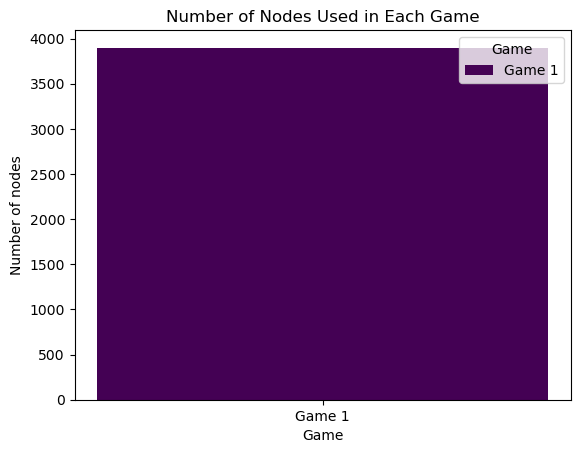

Ai Wins 100.0 % 
Draw Games 0.0 % 


In [2]:

# Alpha beta
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np



stats_alpha = []

ai_win = 0
draw = 0
player_win = 0
total_games = 0

class TicTacToe :
    def __init__(self, root):
        self.root = root
        self.root.title("Tic Tac Toe")
        self.nodes_visited = []
        self.nodes = 0

        self.board = [[" " for _ in range(3)] for _ in range(3)]
        self.current_player = "X"
        self.game_over = False


        self.buttons = [[tk.Button(root, text=" ", width=10, height=3, font=("Helvetica", 16),
                                   command=lambda row=row, col=col: self.button_click(row, col)) for col in range(3)] for row in range(3)]

        for row in range(3):
            for col in range(3):
                self.buttons[row][col].grid(row=row, column=col, padx=5, pady=5)

        reset_button = tk.Button(root, text="Reset", command=self.reset_game)
        reset_button.grid(row=3, column=1, pady=10)

    def button_click(self, row, col):
        if self.board[row][col] == " " and not self.game_over:
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player, state=tk.DISABLED)

            if self.check_win(self.current_player):
                messagebox.showinfo("Game Over", f"{self.current_player} wins!")
                self.game_over = True
            elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
                messagebox.showinfo("Game Over", "It's a tie!")
                self.game_over = True
            else:
                self.switch_player_turn()
                if self.current_player == "O":
                    self.root.after(1000, self.ai_move)

    def switch_player_turn(self):

        self.current_player = "O" if self.current_player == "X" else "X"

    def ai_move(self):
        best_move = self.alpha_beta_pruning()
        row, col = best_move
        self.perform_ai_move(row, col)

    def alpha_beta_pruning(self):
        best_score = float("-inf")
        best_move = None
        nodes_visited = 0 


        for row in range(3):
            for col in range(3):
                if self.board[row][col] == " ":
                    nodes_visited += 1 
                    self.board[row][col] = "O"
                    score = self.minimax(self.board, 0, False, float("-inf"), float("inf"))
                    self.board[row][col] = " "  

                    if score > best_score:
                        best_score = score
                        best_move = (row, col)

        self.nodes_visited.append(nodes_visited)  

        return best_move

    def minimax(self, board, depth, is_maximizing, alpha, beta):
        if self.check_win("X", board):
            return -1
        elif self.check_win("O", board):
            return 1
        elif all(board[i][j] != " " for i in range(3) for j in range(3)):
            return 0

        if is_maximizing:
            max_eval = float("-inf")
            for row in range(3):
                for col in range(3):
                    if board[row][col] == " ":
                        board[row][col] = "O"
                        eval = self.minimax(board, depth + 1, False, alpha, beta)
                        board[row][col] = " "  
                        max_eval = max(max_eval, eval)
                        alpha = max(alpha, eval)
                        if beta <= alpha:
                            break  
                        self.nodes += 1
            return max_eval
        else:
            min_eval = float("inf")
            for row in range(3):
                for col in range(3):
                    if board[row][col] == " ":
                        board[row][col] = "X"
                        eval = self.minimax(board, depth + 1, True, alpha, beta)
                        board[row][col] = " " 
                        min_eval = min(min_eval, eval)
                        beta = min(beta, eval)
                        if beta <= alpha:
                            break 
                        self.nodes += 1
            return min_eval

    def perform_ai_move(self, row, col):
        self.board[row][col] = "O"
        self.buttons[row][col].config(text="O", state=tk.DISABLED)
        global ai_win
        global draw
        global total_games

        if self.check_win("O"):
            messagebox.showinfo("Game Over", "AI wins!")
            self.game_over = True
            stats_alpha.append(self.nodes)
            print("NUMBER OF NODES :", self.nodes)
            self.nodes = 0

            ai_win += 1
            total_games += 1

        elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
            messagebox.showinfo("Game Over", "It's a tie!")
            self.game_over = True
            stats_alpha.append(self.nodes)
            print("NUMBER OF NODES :", self.nodes)
            self.nodes = 0

            draw += 1
            total_games += 1

        else:
            self.current_player = "X"

    def check_win(self, player, board=None):
        if board is None:
            board = self.board

        for i in range(3):
            if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
                return True
        if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
            return True
        return False

    def reset_game(self):
        for row in range(3):
            for col in range(3):
                self.board[row][col] = " "
                self.buttons[row][col].config(text=" ", state=tk.NORMAL)
        self.current_player = "O"
        self.root.after(0, self.ai_move())
        self.game_over = False
        plotNodes(stats_alpha)



    def reset_game_and_switch_player(self):
        self.reset_game()
        self.current_player = "O"


def plotNodes(stats_symmetry):
    labels = [f'Game {i+1}' for i in range(len(stats_symmetry))]
    numbers = stats_symmetry
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

    bars = plt.bar(labels, numbers, color=colors)

    plt.xlabel('Game')
    plt.ylabel('Number of nodes')
    plt.title('Number of Nodes Used in Each Game')
    plt.legend(bars, labels, title='Game')
    plt.show()

    print(f"Ai Wins {(ai_win / total_games) * 100} % ")
    print(f"Draw Games {(draw / total_games) * 100} % ")

if __name__ == "__main__":
    root = tk.Tk()
    game = TicTacToe(root)
    root.mainloop()


NUMBER OF NODES: 5


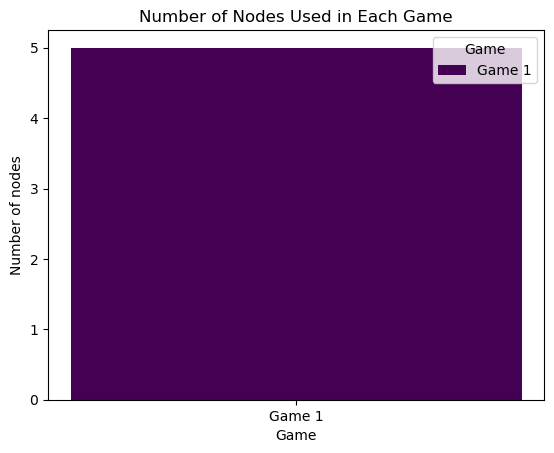

NUMBER OF NODES: 4


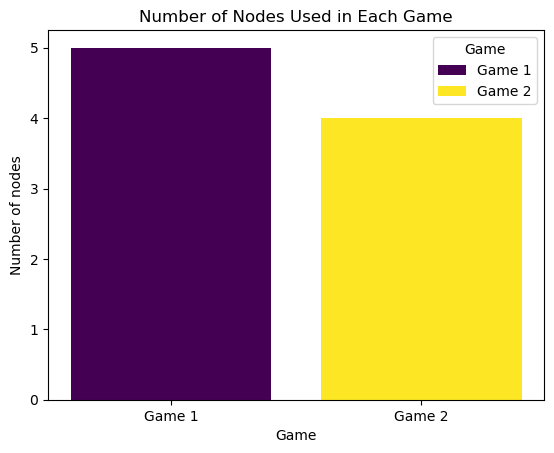

NUMBER OF NODES: 4


In [3]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np

Hnode_count_list = []


class HueristicReduction:
    def __init__(self, root):
        self.root = root
        self.root.title("Tic Tac Toe")

        self.nodes = 0

        self.board = [[" " for _ in range(3)] for _ in range(3)]
        self.current_player = "X"
        self.game_over = False

        self.buttons = [
            [
                tk.Button(
                    root,
                    text=" ",
                    width=10,
                    height=3,
                    font=("Helvetica", 16),
                    command=lambda row=row, col=col: self.button_click(row, col),
                )
                for col in range(3)
            ]
            for row in range(3)
        ]

        for row in range(3):
            for col in range(3):
                self.buttons[row][col].grid(row=row, column=col, padx=5, pady=5)
        reset_button = tk.Button(root, text="Reset", command=self.reset_game)
        reset_button.grid(row=3, column=1, pady=10)

    def button_click(self, row, col):
        if self.board[row][col] == " " and not self.game_over:
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player, state=tk.DISABLED)

            if self.check_win(self.current_player):
                self.game_over = True
                self.nodes += 1  
                Hnode_count_list.append(self.nodes)
                self.nodes = 0
                messagebox.showinfo("Game Over", f"{self.current_player} wins!")

            elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
                self.game_over = True
                self.nodes += 1 
                Hnode_count_list.append(self.nodes)
                self.nodes = 0
                messagebox.showinfo("Game Over", "It's a tie!")

            else:
                self.current_player = "O" if self.current_player == "X" else "X"
                if self.current_player == "O":
                    self.root.after(
                        1000, self.ai_move
                    )  
                self.nodes += 1  
            

    def ai_move(self):
        best_moves = self.get_best_moves()
        if best_moves:
            row, col = best_moves[0]
            self.perform_ai_move(row, col)
        else:
            for row in range(3):
                for col in range(3):
                    if self.board[row][col] == " ":
                        self.button_click(row, col)

    def get_best_moves(self):
        for row in range(3):
            for col in range(3):
                if self.board[row][col] == " ":
                    if self.check_potential_win(row, col, "O"):
                        return [(row, col)]

        for row in range(3):
            for col in range(3):
                if self.board[row][col] == " ":
                    if self.check_potential_win(row, col, "X"):
                        return [(row, col)]

       
        return self.get_symmetric_moves()

    def get_symmetric_moves(self):
        center = (1, 1)
        corners = [(0, 0), (0, 2), (2, 0), (2, 2)]
        available_moves = [
            move for move in [center] + corners if self.board[move[0]][move[1]] == " "
        ]

        return available_moves

    def perform_ai_move(self, row, col):
        self.board[row][col] = "O"
        self.buttons[row][col].config(text="O", state=tk.DISABLED)

        if self.check_win("O"):
            messagebox.showinfo("Game Over", "AI wins!")
            self.game_over = True
            Hnode_count_list.append(self.nodes)
            print("NUMBER OF NODES:", self.nodes)
            self.nodes = 0
        elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
            messagebox.showinfo("Game Over", "It's a tie!")
            self.game_over = True
            Hnode_count_list.append(self.nodes)
            print("NUMBER OF NODES:", self.nodes)
            self.nodes = 0
        else:
            self.current_player = "X"
            self.nodes += 1  

    def check_potential_win(self, row, col, player):
        temp_board = [row[:] for row in self.board]
        temp_board[row][col] = player
        return self.check_win(player, board=temp_board)

    def evaluate_board(self):
        scores = {"X": 1, "O": -1, " ": 0}
        total_score = 0

        for row in self.board:
            total_score += sum(scores[cell] for cell in row)

        for col in range(3):
            total_score += sum(scores[self.board[row][col]] for row in range(3))

        total_score += sum(scores[self.board[i][i]] for i in range(3))
        total_score += sum(scores[self.board[i][2 - i]] for i in range(3))

        return total_score

    def check_win(self, player, board=None):
        if board is None:
            board = self.board

        for i in range(3):
            if all(board[i][j] == player for j in range(3)) or all(
                board[j][i] == player for j in range(3)
            ):
                return True
            if all(board[i][i] == player for i in range(3)) or all(
                board[i][2 - i] == player for i in range(3)
            ):
                return True

        return False

    def reset_game(self):
        for row in range(3):
            for col in range(3):
                self.board[row][col] = " "
                self.buttons[row][col].config(text=" ", state=tk.NORMAL)
            self.current_player = "O"
        self.root.after(0, self.ai_move())
        self.game_over = False
        plotNodes(Hnode_count_list)


def plotNodes(stats_symmetry):
    labels = [f"Game {i+1}" for i in range(len(stats_symmetry))]
    numbers = stats_symmetry
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    bars = plt.bar(labels, numbers, color=colors)

    plt.xlabel("Game")
    plt.ylabel("Number of nodes")
    plt.title("Number of Nodes Used in Each Game")

    plt.legend(bars, labels, title="Game")
    plt.show()


if __name__ == "__main__":
    root = tk.Tk()
    game = HueristicReduction(root)
    root.mainloop()


NUMBER OF NODES: 5


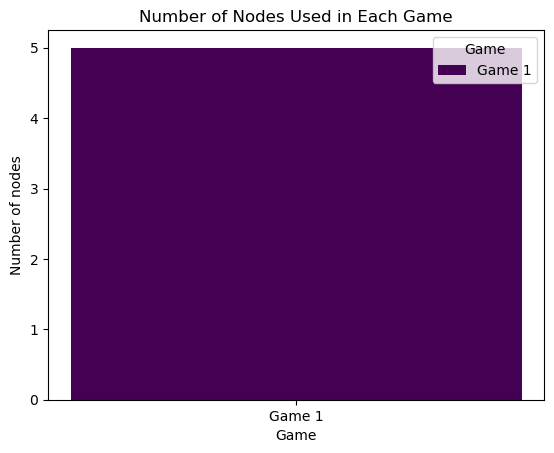

NUMBER OF NODES: 6


In [4]:
# S_R

import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np

Snode_count_list = []



class SymmetryReduction:
    def __init__(self, root):
        self.root = root
        self.root.title("Tic Tac Toe")

        self.nodes = 0

        self.board = [[" " for _ in range(3)] for _ in range(3)]
        self.current_player = "X"
        self.game_over = False

        self.buttons = [
            [
                tk.Button(
                    root,
                    text=" ",
                    width=10,
                    height=3,
                    font=("Helvetica", 16),
                    command=lambda row=row, col=col: self.button_click(row, col),
                )
                for col in range(3)
            ]
            for row in range(3)
        ]

        for row in range(3):
            for col in range(3):
                self.buttons[row][col].grid(row=row, column=col, padx=5, pady=5)

        reset_button = tk.Button(root, text="Reset", command=self.reset_game)
        reset_button.grid(row=3, column=1, pady=10)

    def button_click(self, row, col):
        if self.board[row][col] == " " and not self.game_over:
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player, state=tk.DISABLED)

            if self.check_win(self.current_player):
                self.game_over = True
                self.nodes += 1 
                Snode_count_list.append(self.nodes)
                self.nodes = 0
                messagebox.showinfo("Game Over", f"{self.current_player} wins!")

            elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
                self.game_over = True
                self.nodes += 1
                Snode_count_list.append(self.nodes)
                self.nodes = 0
                messagebox.showinfo("Game Over", "It's a tie!")

            else:
                self.current_player = "O" if self.current_player == "X" else "X"
                if self.current_player == "O":
                    self.root.after(
                        1000, self.ai_move
                    ) 
                self.nodes += 1  

    def ai_move(self):
        for row in range(3):
            for col in range(3):
                if self.board[row][col] == " ":
                    if self.check_potential_win(row, col, "O"):
                        self.perform_ai_move(row, col)
                        return
                    elif self.check_potential_win(row, col, "X"):
                        self.perform_ai_move(row, col)
                        return
        best_moves = self.get_symmetric_moves()
        if best_moves:
            row, col = best_moves[0]
            self.perform_ai_move(row, col)
        else:
            for row in range(3):
                for col in range(3):
                    if self.board[row][col] == " ":
                        self.button_click(row, col)

    def get_symmetric_moves(self):
        center = (1, 1)
        corners = [(0, 0), (0, 2), (2, 0), (2, 2)]

        available_moves = [
            move for move in [center] + corners if self.board[move[0]][move[1]] == " "
        ]

        return available_moves

    def perform_ai_move(self, row, col):
        self.board[row][col] = "O"
        self.buttons[row][col].config(text="O", state=tk.DISABLED)

        if self.check_win("O"):
            messagebox.showinfo("Game Over", "AI wins!")
            self.game_over = True
            Snode_count_list.append(self.nodes)
            print("NUMBER OF NODES:", self.nodes)
            self.nodes = 0
        elif all(self.board[i][j] != " " for i in range(3) for j in range(3)):
            messagebox.showinfo("Game Over", "It's a tie!")
            self.game_over = True
            Snode_count_list.append(self.nodes)
            print("NUMBER OF NODES:", self.nodes)
            self.nodes = 0
        else:
            self.current_player = "X"
            self.nodes += 1  

    def check_potential_win(self, row, col, player):
        temp_board = [row[:] for row in self.board]
        temp_board[row][col] = player
        return self.check_win(player, board=temp_board)

    def evaluate_board(self):
        scores = {"X": 1, "O": -1, " ": 0}
        total_score = 0

        for row in self.board:
            total_score += sum(scores[cell] for cell in row)

        for col in range(3):
            total_score += sum(scores[self.board[row][col]] for row in range(3))

        total_score += sum(scores[self.board[i][i]] for i in range(3))
        total_score += sum(scores[self.board[i][2 - i]] for i in range(3))

        return total_score

    def check_win(self, player, board=None):
        if board is None:
            board = self.board

        for i in range(3):
            if all(board[i][j] == player for j in range(3)) or all(
                board[j][i] == player for j in range(3)
            ):
                return True
            if all(board[i][i] == player for i in range(3)) or all(
                board[i][2 - i] == player for i in range(3)
            ):
                return True

        return False

    def reset_game(self):
        for row in range(3):
            for col in range(3):
                self.board[row][col] = " "
                self.buttons[row][col].config(text=" ", state=tk.NORMAL)
            self.current_player = "O"
        self.root.after(0, self.ai_move())
        self.game_over = False
        plotNodes(Snode_count_list)


def plotNodes(stats_symmetry):
    # Data
    labels = [f"Game {i+1}" for i in range(len(stats_symmetry))]
    numbers = stats_symmetry
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    bars = plt.bar(labels, numbers, color=colors)
    plt.xlabel("Game")
    plt.ylabel("Number of nodes")
    plt.title("Number of Nodes Used in Each Game")
    plt.legend(bars, labels, title="Game")

    plt.show()


if __name__ == "__main__":
    root = tk.Tk()
    game = SymmetryReduction(root)
    root.mainloop()


Number of nodes = [2487]


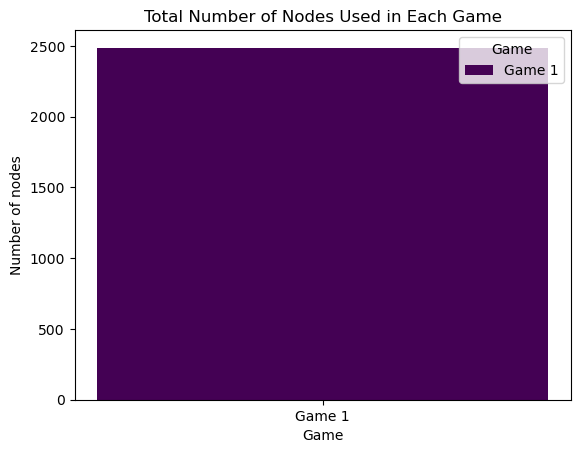

Number of nodes = [2487, 4696]


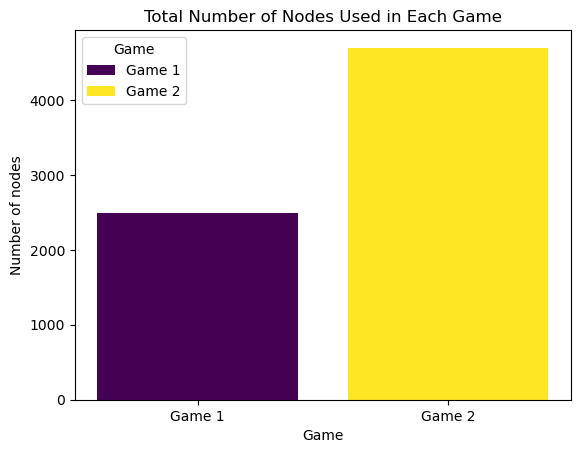

In [5]:
# MINMAX_WITH_HEU_win
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
class TicTacToe:
    def __init__(self):
        self.window = tk.Tk()
        self.window.title("Tic Tac Toe")
        self.current_player = 'X'
        self.board = [' ' for _ in range(9)]
        self.nodes_count = [] 
        self.games_count = 0
        self.ai_moves_count = 0
        self.human_moves_count = 0
        self.draws_count = 0
        self.total_nodes_count = [] 

        self.buttons = [tk.Button(self.window, text=' ', font=('Helvetica', 20), width=8, height=4, bg="pink",
                                  command=lambda idx=i: self.click(idx)) for i in range(9)]
        for i, button in enumerate(self.buttons):
            row, col = divmod(i, 3)
            button.grid(row=row, column=col)

    def click(self, idx):
        if self.board[idx] == ' ':
            self.board[idx] = self.current_player
            self.buttons[idx].config(text=self.current_player)
            result = self.check_winner()
            if result:
                if result == 'draw':
                    messagebox.showinfo("Game Over", "It's a draw!")
                else:
                    messagebox.showinfo("Game Over", f"Player {result} wins!")
                    
                self.games_count += 1
                self.total_nodes_count.append(sum(self.nodes_count))
                self.nodes_count = [] if result != 'draw' else self.nodes_count 
                self.reset_game(result)
                
                
            else:
                self.current_player = 'O' if self.current_player == 'X' else 'X'
                if self.current_player == 'O':
                    self.ai_move()

    def ai_move(self):
        self.nodes_count.append(0)
        best_score = float('-inf')
        best_move = None

        for i in range(9):
            if self.board[i] == ' ':
                self.board[i] = 'O'
                score = self.minimax(self.board, 0, False)
                self.board[i] = ' '

                if score > best_score:
                    best_score = score
                    best_move = i

        self.click(best_move)

        self.nodes_count[-1] += 1

    def minimax(self, board, depth, is_maximizing):
        scores = {'X': -1, 'O': 1, 'draw': 0}

        winner = self.check_winner(board)
        if winner:
            return scores[winner]

        if depth == 3:
            return self.evaluate(board)

        if is_maximizing:
            max_eval = float('-inf')
            for i in range(9):
                if board[i] == ' ':
                    board[i] = 'O'
                    eval = self.minimax(board, depth + 1, False)
                    board[i] = ' '
                    max_eval = max(max_eval, eval)
                    self.nodes_count[-1] += 1  
            return max_eval
        else:
            min_eval = float('inf')
            for i in range(9):
                if board[i] == ' ':
                    board[i] = 'X'
                    eval = self.minimax(board, depth + 1, True)
                    board[i] = ' '
                    min_eval = min(min_eval, eval)
                    self.nodes_count[-1] += 1
            return min_eval

    def evaluate(self, board):
        lines = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6)]

        score = 0
        for line in lines:
            line_values = [board[i] for i in line]
            score += self.evaluate_line(line_values)

        return score

    def evaluate_line(self, line):
        weights = {'X': -1, 'O': 1, ' ': 0}

        if line.count('O') == 2 and line.count(' ') == 1:
            return weights['O'] * 2

        if line.count('O') == 1 and line.count(' ') == 2 and 4 in line:
            return weights['O'] * 1.5

        return sum(weights[cell] for cell in line)

    def check_winner(self, board=None):
        if board is None:
            board = self.board

        for i in range(3):
            if board[i] == board[i + 3] == board[i + 6] != ' ':
                return board[i]

            if board[i * 3] == board[i * 3 + 1] == board[i * 3 + 2] != ' ':
                return board[i * 3]

        if board[0] == board[4] == board[8] != ' ':
            return board[0]
        if board[2] == board[4] == board[6] != ' ':
            return board[2]

        if ' ' not in board:
            return 'draw'

        return None

    def reset_game(self, winner=None):
        for i in range(9):
            self.board[i] = ' '
            self.buttons[i].config(text=' ')

        self.plot_nodes_count()
        if winner:
            if winner == 'draw':
             self.draws_count =self.draws_count +1
             self.current_player = 'X'
            elif winner == 'O':
                self.ai_moves_count =self.ai_moves_count + 1
                self.ai_move()
            elif winner == 'X':
                 self.human_moves_count +=1  
        else:
            self.current_player = 'X'
        self.display_counts()  

    def plot_nodes_count(self):
        plt.clf()

        labels = [f'Game {i + 1}' for i in range(self.games_count)]
        numbers = self.total_nodes_count
        print("Number of nodes =", numbers)

        colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

        bars = plt.bar(labels, numbers, color=colors)

        plt.xlabel('Game')
        plt.ylabel('Number of nodes')
        plt.title('Total Number of Nodes Used in Each Game')

        plt.legend(bars, labels, title='Game')

        plt.show()

    def display_counts(self):
        count_text = f'AI win: {self.ai_moves_count}\nHuman win: {self.human_moves_count}\nDraws: {self.draws_count}'
        count_label = tk.Label(self.window, text=count_text, font=('Helvetica', 14))
        count_label.grid(row=3, column=0, columnspan=3)


    def run(self):
        self.window.mainloop()

if __name__ == "__main__":
    game = TicTacToe()
    game.run()


Number of nodes = [4100]


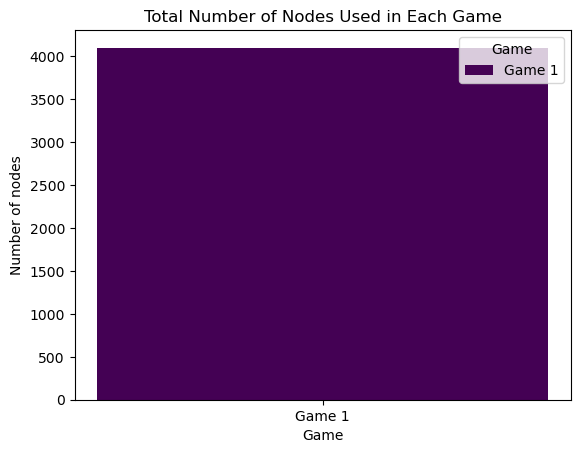

In [6]:
# MIN_MAX_WITH_HEU_CORNER
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
class MIN_MAX_WITH_HEU_CORNER :
    def __init__(self):
        self.window = tk.Tk()
        self.window.title("Tic Tac Toe")
        self.current_player = 'X'
        self.board = [' ' for _ in range(9)]
        self.nodes_count = [] 
        self.games_count = 0
        self.ai_moves_count = 0
        self.human_moves_count = 0
        self.draws_count = 0
        self.total_nodes_count = [] 

        self.buttons = [tk.Button(self.window, text=' ', font=('Helvetica', 20), width=8, height=4, bg="pink",
                                  command=lambda idx=i: self.click(idx)) for i in range(9)]

        for i, button in enumerate(self.buttons):
            row, col = divmod(i, 3)
            button.grid(row=row, column=col)

    def click(self, idx):
        if self.board[idx] == ' ':
            self.board[idx] = self.current_player
            self.buttons[idx].config(text=self.current_player)
            result = self.check_winner()
            if result:
                if result == 'draw':
                    messagebox.showinfo("Game Over", "It's a draw!")
                else:
                    messagebox.showinfo("Game Over", f"Player {result} wins!")

                self.games_count += 1
                self.total_nodes_count.append(sum(self.nodes_count))
                self.nodes_count = [] if result != 'draw' else self.nodes_count  # Reset only if not a draw

                self.reset_game(result)
            else:
                self.current_player = 'O' if self.current_player == 'X' else 'X'
                if self.current_player == 'O':
                    self.best_first_search()

    def best_first_search(self):
        self.nodes_count.append(0)
        best_score = float('-inf')
        best_move = None

        for i in range(9):
            if self.board[i] == ' ':
                score = self.minimax(self.board, 0, False, i)
                if score > best_score:
                    best_score = score
                    best_move = i

                self.nodes_count[-1] += 1 

        self.click(best_move)

    def minimax(self, board, depth, is_maximizing, move):
        scores = {'X': -1, 'O': 1, 'draw': 0}

        winner = self.check_winner(board)
        if winner:
            return scores[winner]

        if depth == 3:
            return self.evaluate(board, move)

        if is_maximizing:
            max_eval = float('-inf')
            for i in range(9):
                if board[i] == ' ':
                    board[i] = 'O'
                    eval = self.minimax(board, depth + 1, False, move)
                    board[i] = ' '
                    max_eval = max(max_eval, eval)
                    self.nodes_count[-1] += 1  
            return max_eval
        else:
            min_eval = float('inf')
            for i in range(9):
                if board[i] == ' ':
                    board[i] = 'X'
                    eval = self.minimax(board, depth + 1, True, move)
                    board[i] = ' '
                    min_eval = min(min_eval, eval)
                    self.nodes_count[-1] += 1  
            return min_eval

    def evaluate(self, board, move):
        empty_cells_around = 0
        row, col = divmod(move, 3)

        for i in range(max(0, row - 1), min(row + 2, 3)):
            for j in range(max(0, col - 1), min(col + 2, 3)):
                if board[3 * i + j] == ' ':
                    empty_cells_around += 1

        return empty_cells_around

    def check_winner(self, board=None):
        if board is None:
            board = self.board

        for i in range(3):
            if board[i] == board[i + 3] == board[i + 6] != ' ':
                return board[i]

            if board[i * 3] == board[i * 3 + 1] == board[i * 3 + 2] != ' ':
                return board[i * 3]

        if board[0] == board[4] == board[8] != ' ':
            return board[0]
        if board[2] == board[4] == board[6] != ' ':
            return board[2]

        if ' ' not in board:
            return 'draw'

        return None

    def reset_game(self, winner=None):
        for i in range(9):
            self.board[i] = ' '
            self.buttons[i].config(text=' ')
        self.plot_nodes_count()    

        if winner:
            if winner == 'draw':
                self.draws_count =self.draws_count +1
                self.current_player = 'X'
                
            elif winner == 'O':
                self.ai_moves_count =self.ai_moves_count + 1
                self.best_first_search()
                
            elif winner == 'X':
                 self.human_moves_count +=1    
        else:
            self.current_player = 'X'
        self.display_counts()   

    def plot_nodes_count(self):
        plt.clf()

        labels = [f'Game {i + 1}' for i in range(self.games_count)]
        numbers = self.total_nodes_count
        print("Number of nodes =", numbers)

        colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

        bars = plt.bar(labels, numbers, color=colors)

        plt.xlabel('Game')
        plt.ylabel('Number of nodes')
        plt.title('Total Number of Nodes Used in Each Game')

     
        plt.legend(bars, labels, title='Game')

        plt.show()
      

    def display_counts(self):
        count_text = f'AI win: {self.ai_moves_count}\nHuman win: {self.human_moves_count}\nDraws: {self.draws_count}'
        count_label = tk.Label(self.window, text=count_text, font=('Helvetica', 14))
        count_label.grid(row=3, column=0, columnspan=3)


    def run(self):
        self.window.mainloop()

if __name__ == "__main__":
    game = MIN_MAX_WITH_HEU_CORNER()
    game.run()


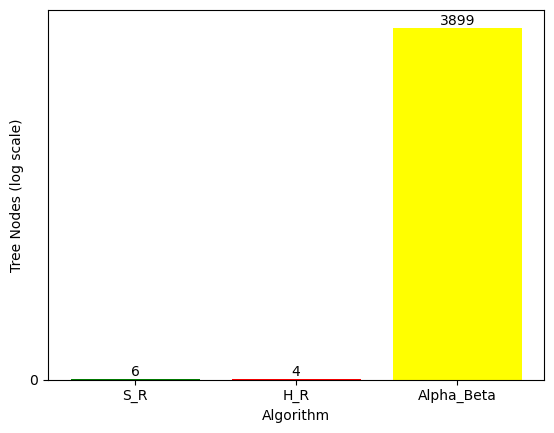

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['S_R', 'H_R','Alpha_Beta']
numbers = np.array([np.mean(Snode_count_list),np.mean(Hnode_count_list),np.mean(stats_alpha)])

plt.bar(labels, numbers, color=[ 'green', 'red','yellow'])
plt.yticks(np.arange(0, max(numbers) + 1, step=5000))
for i, value in enumerate(numbers):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.xlabel('Algorithm')
plt.ylabel('Tree Nodes (log scale)')

plt.show()

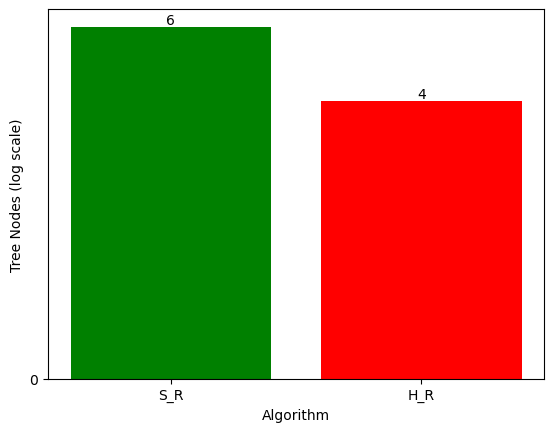

In [9]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['S_R', 'H_R']
numbers = np.array([np.mean(Snode_count_list),np.mean(Hnode_count_list)])

plt.bar(labels, numbers, color=[ 'green', 'red','yellow'])
plt.yticks(np.arange(0, max(numbers) + 1, step=5000))
for i, value in enumerate(numbers):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')
plt.xlabel('Algorithm')
plt.ylabel('Tree Nodes (log scale)')

plt.show()